In [1]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_excel('lesson6_practic.xlsx')

In [3]:
data.head()

,Дата,Значение
0,2014-05-01,0
1,2014-05-02,10
2,2014-05-03,0
3,2014-05-04,0
4,2014-05-05,0


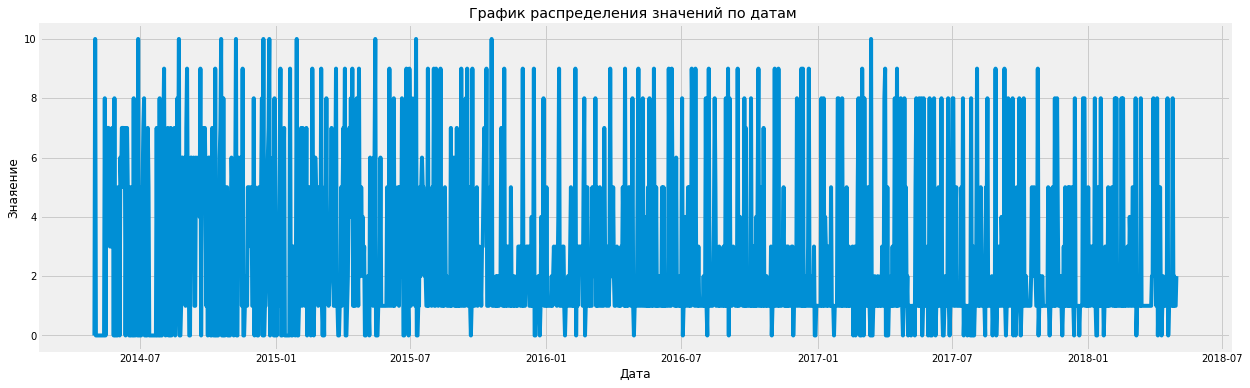

In [16]:
plt.figure(figsize = (19, 6))
plt.plot(data['Дата'], data['Значение']);
plt.title('График распределения значений по датам ')
plt.ylabel('Знаяение'); plt.xlabel('Дата');

Как видим значения пока для нас разбросаны хаотично. Те явных трендов невидно

In [7]:
# Создадим столбцы с годом, месяцем и днем отдельно
data['year'] = data['Дата'].dt.strftime("%Y").astype(int)
data['month'] = data['Дата'].dt.strftime("%m").astype(int)
data['day'] = data['Дата'].dt.strftime("%d").astype(int)

Среднеквадратичная ошибка =  0.01104611182210919


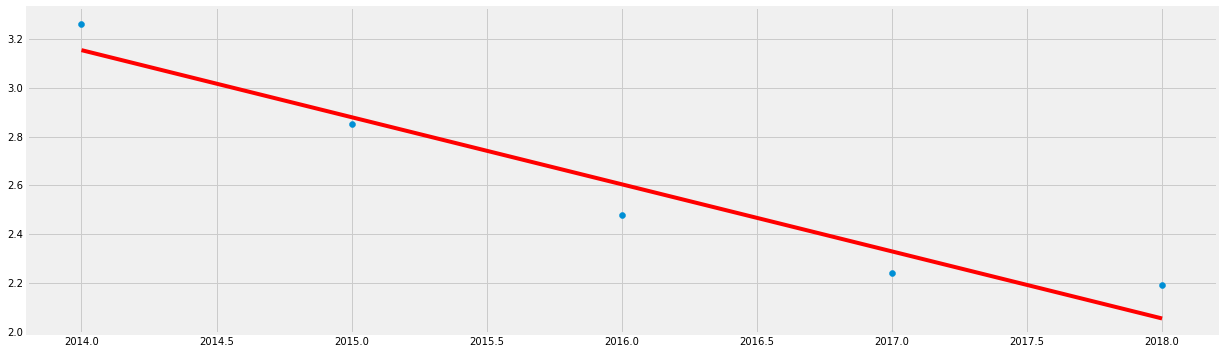

In [14]:
# График среднего значения по годам
# Вычислим коэффициенты линейной регрессии
X = data.groupby('year', as_index = False)['Значение'].mean()['year']
y = data.groupby('year', as_index = False)['Значение'].mean()['Значение']
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b * np.mean(X)
plt.figure(figsize = (19, 6))
y_pred = a + X*b
plt.scatter(X, y)
plt.plot(X, y_pred, c = 'r');

mse_ = np.sum((y_pred - y)**2) / len(list(X))
print('Среднеквадратичная ошибка = ', mse_)

Тут уже наблюдается отрицательный тренд на среднее значение от года

Среднеквадратичная ошибка =  0.057395225155149436


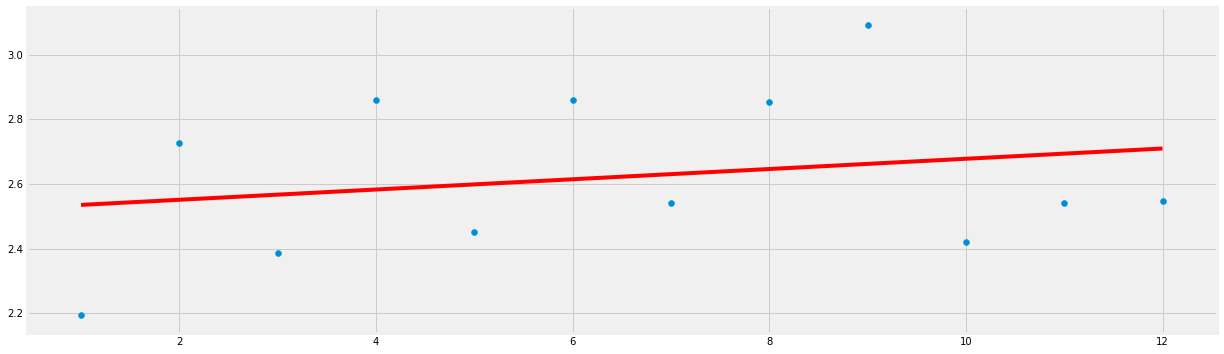

In [17]:
# График среднего значения по годам
# Вычислим коэффициенты линейной регрессии
X = data.groupby('month', as_index = False)['Значение'].mean()['month']
y = data.groupby('month', as_index = False)['Значение'].mean()['Значение']
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b * np.mean(X)
plt.figure(figsize = (19, 6))
y_pred = a + X*b
plt.scatter(X, y)
plt.plot(X, y_pred, c = 'r');

mse_ = np.sum((y_pred - y)**2) / len(list(X))
print('Среднеквадратичная ошибка = ', mse_)

Среднее значение сгруппированное по месяцам всех лет. Как видми, тут нет особой зависимости

Среднеквадратичная ошибка =  0.14262539638198027


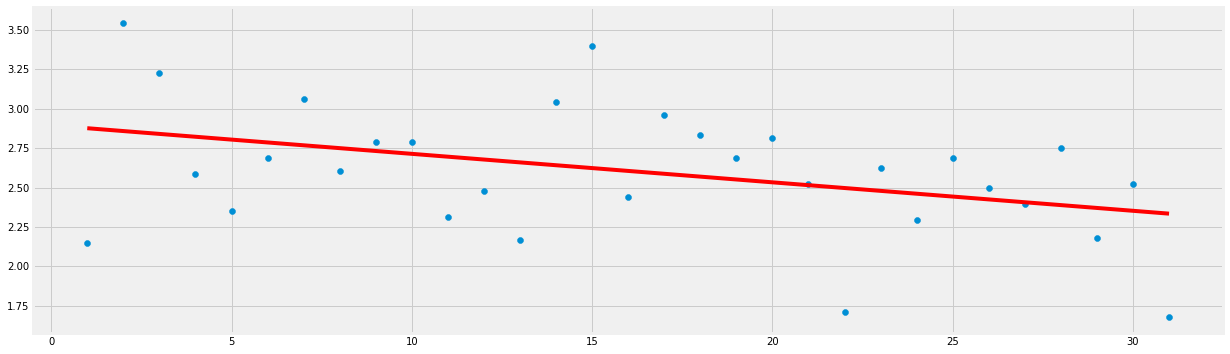

In [18]:
# График среднего значения по годам
# Вычислим коэффициенты линейной регрессии
X = data.groupby('day', as_index = False)['Значение'].mean()['day']
y = data.groupby('day', as_index = False)['Значение'].mean()['Значение']
b = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
a = np.mean(y) - b * np.mean(X)
plt.figure(figsize = (19, 6))
y_pred = a + X*b
plt.scatter(X, y)
plt.plot(X, y_pred, c = 'r');

mse_ = np.sum((y_pred - y)**2) / len(list(X))
print('Среднеквадратичная ошибка = ', mse_)

Среднее значение сгруппированное по дням всех лет. Как видми, тут нет особой зависимости тоже.

Построим модель линейной регрессии для среднего значения по годам

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [31]:
X_train = np.array(data.groupby('year', as_index = False)['Значение'].mean()['year']).reshape(-1, 1)
y_train = np.array(data.groupby('year', as_index = False)['Значение'].mean()['Значение']).reshape(-1, 1)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
# Предскажем среднее значение на 2019б 2020б 2021 года
X_test = np.array([2019, 2020, 2021]).reshape(-1, 1)
y_pred = lr.predict(X_test)

In [41]:
print('Среднее значение на 2019 г. = %s\nСреднее значение на 2020 г. = %s\nСреднее значение на 2020 г. = %s'\
      % (y_pred[0][0], y_pred[1][0], y_pred[2][0]))

Среднее значение на 2019 г. = 1.7784445554552804
Среднее значение на 2020 г. = 1.5031631278156965
Среднее значение на 2020 г. = 1.2278817001762263
